# The Best Neighborhoods to Live in Manhattan: The Battle of Neighborhoods
## Applied Data Science Capstone Project by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results Analysis](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)


## 1. Introduction:  <a name="introduction"></a>
New York City, the home of more than 8.4 million people, is the most populous city in the US. Nearly half of New York City population is made up of people who were born outside the city or even outside the U.S. Its urban core, Manhattan, is the most densely populated of the five boroughs in New York City. As one of the world's major commercial, finance and cultural centers and a vital hub for many industries, Manhattan attracts people from the rest of the US and the world to live here. 

There are different reasons that people move to Manhattan. Different people value certain features more than the others. Some people may want to live close to a grocery store or supermarket, some people may interested in good restaurants nearby, some might prefer to have park nearly, etc. It is not always easy to move to a new city. As people may feel exciting moving to a new place, it could be overwhelming to get to know the new place. Manhattan is an explorer's dream. It is important to know the various neighborboods and figure out the priorities. The better you know about the neighborhoods, the more likely you could pick the best one for you to live in. 

In this project, I will explore the neighborhoods in **Manhattan**. The **objective** is to provide analysis of average rent and venues in each neighborhood from different aspects to help people who are moving to Manhattan to decide **the best neighborhood to live in** based on their interests and budget. 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

## 2. Data: <a name="data"></a>

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


## 2. Data:  <a name="data"></a>

This project utilizes data from the following three sources:

1). New York city neighborhoods coordinates data from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

2). Average Rent in Manhattan neighborhoods data from https://www.rentcafe.com/average-rent-market-trends/us/ny/manhattan/

3). Venues for each neighborhood obtained from Foursquare API

The first data sources provide location (latitude and longitude) information for all the neighborboods from five boroughs in New York City. I extract coordinates information of 40 neighborhoods in Manhattan, which will be used to visualize the location of the neighborhoods in a Manhattan map and to gather venues information from Foursquare. The second data source provides average monthly rent data in U.S. dollars for each of the 40 neighborhoods in Manhattan, which could be used as a reference for budget planning assuming that most people moving to Manhattan will start off renting a place. Using latitudes and longitudes of the neighborhoods from the first data source as input for the Foursquare API, I will explore the neighborhoods by analyzing the venues of people's interests (parks, restaurants, grocery stores, yoga studios, etc). 

First, load the coordinates data of neighborhoods in New Yrk City and create a dataframe "neighborhoods".

In [2]:
# load neighborhoods data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
# check neighborhoods_data
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [5]:
# loop through the data to fill the dataframe with latitudes and longitudes
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Create a subset of the neighborhoods dataframe with Manhattan neighborhoods only.

In [7]:
# create a dataframe with Manhattan data
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Then, load the average monthly rent data for Manhattan neighborhoods, check the dimensions, and merge it with the neighborhood coordinates data into one dataframe df.

In [8]:
# load average rent data in Manhattan
rent_data = pd.read_excel('average rent.xlsx',sheet_name=1)
rent_data.head()

,Neighborhood,Average Rent
0,Battery Park City,4869
1,Carnegie Hill,4177
2,Central Harlem,2710
3,Chelsea,3840
4,Chinatown,4875


In [9]:
manhattan_data.shape

(40, 4)

In [10]:
rent_data.shape

(40, 2)

In [11]:
# merge dataframes
df = pd.merge(manhattan_data,rent_data,on="Neighborhood")
df.head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rent
0,Manhattan,Marble Hill,40.876551,-73.910660,1658
1,Manhattan,Chinatown,40.715618,-73.994279,4875
2,Manhattan,Washington Heights,40.851903,-73.936900,2217
3,Manhattan,Inwood,40.867684,-73.921210,2305
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2710
5,Manhattan,Manhattanville,40.816934,-73.957385,2710
6,Manhattan,Central Harlem,40.815976,-73.943211,2710
7,Manhattan,East Harlem,40.792249,-73.944182,2785
8,Manhattan,Upper East Side,40.775639,-73.960508,4177
9,Manhattan,Yorkville,40.775930,-73.947118,4177


## 3. Methodology:  <a name="methodology"></a>

In this sector, I start with a statistical data analysis of the neighborhoods rent by looking at the distribution of average rent in all Manhattan neighborhoods. Then, I create a map of the neighborhoods to provide a better idea of the locations of different neighborhoods. In order to dig deeper into the neighborhoods, I create a function that takes inputs of neighborhoods with latitudes and longitudes and returns the venues with in a certain defined radius of the neighborhood locations by utilizing the Foursquare API. Finally, I prepare a dataframe containing all the venues in Manhattan neighborhoods for further exploration in the Results sector.  

To find the best neighborhood to live in, the first important thing to do is to identify affordable neighborhoods with reasonable rent level. I create a bar chart using matplotlib to visualize the average rent data in all Manhattan neighborhoods.

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# get a subset and reset the index 
df1=df[['Neighborhood','Average Rent']]
df1.set_index("Neighborhood",drop=True,inplace=True)
df1.head()

,Average Rent
Neighborhood,
Marble Hill,1658
Chinatown,4875
Washington Heights,2217
Inwood,2305
Hamilton Heights,2710


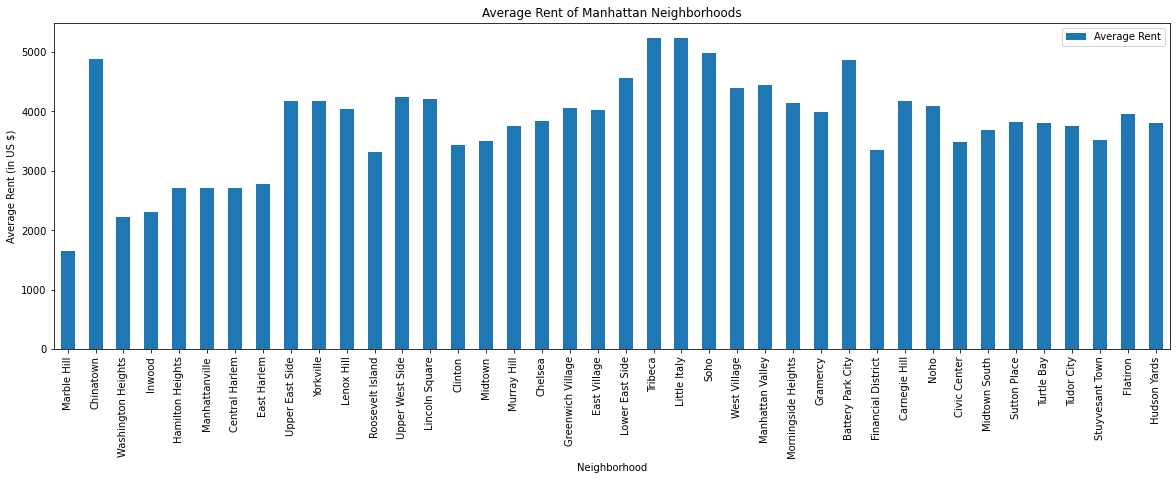

In [14]:
# visualize average rent by neighborhood in a bar chart
df1.plot(kind='bar',figsize=(20,6))
plt.title('Average Rent of Manhattan Neighborhoods')
plt.ylabel('Average Rent (in US $)')
plt.xlabel('Neighborhood')

plt.show()


Budget might be one of the most important factors that affects people's decision of where to live. By viewing some basic statistical details of the data, people know better about the rent level in Manhattan neighborhoods. Little Italy and Tribeca have the highest average rent at 5228 dollars among the 40 neighborhoods, while Marble Hill has the lowest rent at 1658 dollars. There are 16 neighborhoods with rent lower than the mean value of 3800.675 dollars, and 24 neighborhoods withe rent above the mean.

In [15]:
df1.describe()['Average Rent'].to_frame()

,Average Rent
count,40.000000
mean,3800.675000
std,802.371242
min,1658.000000
25%,3476.750000
50%,3901.000000
75%,4185.500000
max,5228.000000


In [16]:
# neighborhoods with rent below mean value
low_rent = df1[df1['Average Rent'] <= 3800.675]
low_rent.sort_values(by=['Average Rent'])

,Average Rent
Neighborhood,
Marble Hill,1658
Washington Heights,2217
Inwood,2305
Hamilton Heights,2710
Manhattanville,2710
Central Harlem,2710
East Harlem,2785
Roosevelt Island,3313
Financial District,3354


In [17]:
print('Number of neighborhoods with rent below mean value: ' + str(low_rent.shape[0]))

Number of neighborhoods with rent below mean value: 16


In [18]:
# neighborhoods with rent above mean value
high_rent = df1[df1['Average Rent'] > 3800.675]
high_rent.sort_values(by=['Average Rent'])

,Average Rent
Neighborhood,
Turtle Bay,3804
Hudson Yards,3809
Sutton Place,3822
Chelsea,3840
Flatiron,3962
Gramercy,3986
East Village,4024
Lenox Hill,4048
Greenwich Village,4056


In [19]:
print('Number of neighborhoods with rent above mean value: ' + str(high_rent.shape[0]))

Number of neighborhoods with rent above mean value: 24


In [20]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


Another important factor that might affect people's decision is the location. Many people prefer to live not too far from where they work or study. I create a map of Manhattan for people to easily visualize the location of neighborhoods with corresponding rent. 

In [21]:
# create a new column for the folium map popup label that contains both neighborhood and rent info
df['Neighborhood Rent'] = df['Neighborhood']+": $"+df['Average Rent'].map(str)
df.head()

,Borough,Neighborhood,Latitude,Longitude,Average Rent,Neighborhood Rent
0,Manhattan,Marble Hill,40.876551,-73.910660,1658,Marble Hill: $1658
1,Manhattan,Chinatown,40.715618,-73.994279,4875,Chinatown: $4875
2,Manhattan,Washington Heights,40.851903,-73.936900,2217,Washington Heights: $2217
3,Manhattan,Inwood,40.867684,-73.921210,2305,Inwood: $2305
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2710,Hamilton Heights: $2710


In [22]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood Rent']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  

    
map_manhattan

Next, to start utilizing the Foursquare API to explore the neighborhoods, define Foursquare credentials and versions.

In [23]:
CLIENT_ID = 'KHOHD2SVGEVBRCHSMNLFJXBQXTXMXQVESKNDLSYRP3BNITKZ' 
CLIENT_SECRET = 'NACU5AE4B4DTHCH3Z3CNRJEJFE02Y4DZPQNQUO54YWLQZMBJ' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KHOHD2SVGEVBRCHSMNLFJXBQXTXMXQVESKNDLSYRP3BNITKZ
CLIENT_SECRET:NACU5AE4B4DTHCH3Z3CNRJEJFE02Y4DZPQNQUO54YWLQZMBJ


Create a function that takes inputs of neighborhoods with latitudes and longitudes and returns the venues with in a certain defined radius of the neighborhood locations.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the function above to generate a dataframe with venues in all Manhattan neighborhoods.

In [25]:
all_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
all_venues.head()

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


The dataframe all_venues contains all veues in the neighborhoods of Manhattan. In the rest of the project, I will use this dataframe to explore neighborhoods in Manhattan. 

## 4. Results:  <a name="results"></a>

Now we have all the venues information in each Manhattan neighborhood in the all_venues dataframe. In this sector, I will first do a general check of the types of venues, filter out the venues of interest, and visualize these venues on a Manhattan map. Then I will perform **one hot encoding** to narrow the list of neighborhoods to the ones including the venues of interest only and identify the best neighborhood to live in. Lastly, a **k-means clustering analysis** is used to provide suggestions of similar neighborhoods that fits one's budget. 


### 4.1 Visualize the distribution of venues of interest on a map:

Check the size of the resulting dataframe.

In [26]:
print(all_venues.shape)
all_venues.head()

(3201, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


Examine the categories of venues and filter out the ones of interest.

In [27]:
# check venue categories in the dataframe
all_venues['Venue Category'].unique()

array(['Pizza Place', 'Yoga Studio', 'Diner', 'Donut Shop', 'Coffee Shop',
       'Gym', 'Seafood Restaurant', 'Department Store', 'Tennis Stadium',
       'Pharmacy', 'Supplement Shop', 'Discount Store', 'Sandwich Place',
       'Ice Cream Shop', 'American Restaurant', 'Video Game Store',
       'Steakhouse', 'Kids Store', 'Shopping Mall', 'Deli / Bodega',
       'Hotel', 'Cocktail Bar', 'Greek Restaurant', 'Chinese Restaurant',
       'Bakery', 'Spa', 'Museum', 'Hotpot Restaurant', 'Bubble Tea Shop',
       'Salon / Barbershop', 'Dessert Shop', 'Garden Center',
       'New American Restaurant', 'Indie Movie Theater',
       'Asian Restaurant', 'Tea Room', 'Roof Deck', 'Historic Site',
       'Spanish Restaurant', 'Bike Shop', 'Noodle House', 'Record Shop',
       'Furniture / Home Store', 'Thai Restaurant', 'Boutique',
       'Malay Restaurant', 'Supermarket', 'Music Venue',
       'Dim Sum Restaurant', 'Cosmetics Shop', 'Organic Grocery',
       'Vietnamese Restaurant', 'Optical Sho

Knowing that different people have different priorities of the venues they are interested in, I need to make some assumptions about the interested venues here. Assume that we are looking for the best neighborhood to live in Manhattan for a person who is interested in having these types of venues nearby: **Grocery stores, restaurants, coffee places, parks, and gyms**.

Define dataframes that contain the **five** types of venues of interest.

In [28]:
grocery = all_venues[(all_venues['Venue Category'].str.contains('Grocery|Supermarket', case=False))]
restaurant = all_venues[(all_venues['Venue Category'].str.contains('Restaurant',case=False))]
coffee = all_venues[(all_venues['Venue Category'].str.match('Café')) | (all_venues['Venue Category'].str.match('Coffee Shop'))]
park = all_venues[all_venues['Venue Category'].str.match('Park')]
gym = all_venues[(all_venues['Venue Category'].str.match('Gym')) | (all_venues['Venue Category'].str.match('Gym / Fitness Center'))| (all_venues['Venue Category'].str.match('Climbing Gym'))| (all_venues['Venue Category'].str.match('Boxing Gym'))| (all_venues['Venue Category'].str.match('Gym Pool'))| (all_venues['Venue Category'].str.match('Yoga Studio'))| (all_venues['Venue Category'].str.match('Dance Studio'))]


In [29]:
gym.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
5,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym
6,Marble Hill,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym
171,Washington Heights,40.851903,-73.936900,Planet Fitness,40.847536,-73.937937,Gym / Fitness Center
181,Washington Heights,40.851903,-73.936900,Blink Fitness,40.848562,-73.936941,Gym
205,Washington Heights,40.851903,-73.936900,Lucille Roberts,40.848487,-73.934636,Gym
226,Inwood,40.867684,-73.921210,Bread and Yoga,40.868229,-73.918028,Yoga Studio
272,Hamilton Heights,40.823604,-73.949688,Bikram Yoga Harlem,40.825672,-73.948887,Yoga Studio
278,Hamilton Heights,40.823604,-73.949688,Brahman Yoga Studio,40.825319,-73.947848,Yoga Studio
334,Manhattanville,40.816934,-73.957385,Steep Rock West,40.816668,-73.957969,Climbing Gym


Create a Manhattan map to visualize the distribution of the **five** types of **venues of interest** by different colors of markers. 

venue | color      
---|--------------------
grocery    |   blue  
restaurants    |	red 
coffee   |	yellow   
parks     |	green    
gyms    |	purple 

In [30]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [31]:
# create a map to show the venues of interest

map4 = folium.Map(location=[latitude, longitude], zoom_start=11)
incidents = folium.map.FeatureGroup()

# grocery stores and supermarkets
for lat, lng, in zip(grocery["Venue Latitude"], grocery["Venue Longitude"]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='blue',
        )
    )  
# restaurants 
for lat, lng, in zip(restaurant["Venue Latitude"], restaurant["Venue Longitude"]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='red',
        )
    )
# coffee shops    
for lat, lng, in zip(coffee["Venue Latitude"], coffee["Venue Longitude"]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
        )
    )   
# parks
for lat, lng, in zip(park["Venue Latitude"], park["Venue Longitude"]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='green',
        )
    ) 
# gyms    
for lat, lng, in zip(gym["Venue Latitude"], gym["Venue Longitude"]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='purple',
        )
    ) 
    
map4.add_child(incidents)
map4

Now you see all of the venues of interest on the map. However, with so many markers on the map, it is hard to count the number of each type of venues in each neighborhood and make comparison across neighborhoods. 


### 4.2 One hot encoding to analyze each neighborhood for the venues of interest:

To better analyze the venues of interest in each neighborhood, I use one hot encoding to count venues of interest (**grocery stores, restaurants, coffee places, parks, and gyms**) located in each neighborhood and identify the best neighborhood to live in. We are interested in these five types of venues no matter what specific category they are. For example, we are interested in restaurants no matter what type of restaurants they are. Thus, I add a column **"Venue Type"** to show the general type of the venues. 

Create a dataframe of venues of interest: interest_venues

In [32]:
# add a "venue type" column to each dataframe
grocery['Venue Type'] = 'Grocery'
restaurant['Venue Type'] = 'Restaurant'
coffee['Venue Type'] = 'Coffee'
park['Venue Type'] = 'Park'
gym['Venue Type'] = 'Gym'



<ipython-input-32-1576065aef87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery['Venue Type'] = 'Grocery'
<ipython-input-32-1576065aef87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant['Venue Type'] = 'Restaurant'
<ipython-input-32-1576065aef87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [33]:
frames =[grocery, restaurant, coffee, park, gym]
interest_venues = pd.concat(frames)
interest_venues.sort_values(by=['Neighborhood','Venue Type'], inplace = True)
interest_venues.reset_index(drop=True, inplace=True)

In [34]:
interest_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Type
0,Battery Park City,40.711932,-74.016869,Le District Coffee,40.713284,-74.015854,Coffee Shop,Coffee
1,Battery Park City,40.711932,-74.016869,Starbucks Reserve,40.714170,-74.015434,Coffee Shop,Coffee
2,Battery Park City,40.711932,-74.016869,For Five Coffee Roasters,40.712240,-74.014915,Coffee Shop,Coffee
3,Battery Park City,40.711932,-74.016869,Blue Bottle Coffee,40.710589,-74.012371,Coffee Shop,Coffee
4,Battery Park City,40.711932,-74.016869,Laughing Man Coffee & Tea,40.714754,-74.017368,Coffee Shop,Coffee


In [35]:
interest_venues.shape

(1390, 8)

In [36]:
# one hot encoding
manhattan_onehot = pd.get_dummies(interest_venues[['Venue Type']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = interest_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Coffee,Grocery,Gym,Park,Restaurant
0,Battery Park City,1,0,0,0,0
1,Battery Park City,1,0,0,0,0
2,Battery Park City,1,0,0,0,0
3,Battery Park City,1,0,0,0,0
4,Battery Park City,1,0,0,0,0


In [37]:
manhattan_onehot.shape

(1390, 6)

Next, let's group rows by neighborhood and by taking the sum of occurrence of each venue type. Generate the dataframe **manhattan_grouped** showing the number of the five types of venues, which we are interested in, in each neighborhood. 

In [38]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped

,Neighborhood,Coffee,Grocery,Gym,Park,Restaurant
0,Battery Park City,5,1,4,4,7
1,Carnegie Hill,12,3,8,0,20
2,Central Harlem,1,0,2,1,15
3,Chelsea,8,1,2,2,23
4,Chinatown,2,2,0,0,38
5,Civic Center,9,0,12,3,25
6,Clinton,5,2,10,0,25
7,East Harlem,1,1,2,1,14
8,East Village,4,1,1,1,34
9,Financial District,14,0,4,2,21


In [39]:
manhattan_grouped.shape

(40, 6)

Now we see that some neighborhoods do **Not** have all the types of venues that we are interested in. I will drop the rows (neighborhoods) with zero values to narrow down the favorite neighborhoods to those that include all of the five types of venues. 


Create a dataframe **select_neighborhood**.

In [40]:
select_neighborhood = manhattan_grouped[(manhattan_grouped[['Coffee','Grocery','Gym','Park','Restaurant']] !=0).all(axis=1)]
select_neighborhood.reset_index(drop=True, inplace=True)
select_neighborhood

,Neighborhood,Coffee,Grocery,Gym,Park,Restaurant
0,Battery Park City,5,1,4,4,7
1,Chelsea,8,1,2,2,23
2,East Harlem,1,1,2,1,14
3,East Village,4,1,1,1,34
4,Flatiron,5,1,8,2,34
5,Gramercy,5,2,1,2,18
6,Hudson Yards,5,2,7,2,18
7,Inwood,4,2,1,2,18
8,Lincoln Square,7,2,7,1,13
9,Manhattan Valley,3,1,2,1,15


In [41]:
select_neighborhood.shape

(17, 6)

Now I have reduced the list from all the 40 neighborhoods to the above 17 neighborhoods. To further narrow down the neighborhood list of selection, I calculate a score using the normalized sum of interested venues for each neighborhood and sort the neighborhoods by "score".  

In [42]:
select_neighborhood['Score'] = select_neighborhood.sum(axis=1)
select_neighborhood['Score'] = select_neighborhood['Score']/select_neighborhood['Score'].sum()
select_neighborhood.sort_values('Score', ascending = False, inplace = True)
select_neighborhood.reset_index(drop=True, inplace=True)
select_neighborhood

<ipython-input-42-0de6030b30db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_neighborhood['Score'] = select_neighborhood.sum(axis=1)
<ipython-input-42-0de6030b30db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_neighborhood['Score'] = select_neighborhood['Score']/select_neighborhood['Score'].sum()
<ipython-input-42-0de6030b30db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

,Neighborhood,Coffee,Grocery,Gym,Park,Restaurant,Score
0,Flatiron,5,1,8,2,34,0.090090
1,Turtle Bay,8,1,1,3,36,0.088288
2,Sutton Place,4,2,11,3,27,0.084685
3,West Village,4,1,1,4,35,0.081081
4,East Village,4,1,1,1,34,0.073874
5,Washington Heights,8,2,3,2,22,0.066667
6,Chelsea,8,1,2,2,23,0.064865
7,Hudson Yards,5,2,7,2,18,0.061261
8,Midtown,5,1,4,1,22,0.059459
9,Lincoln Square,7,2,7,1,13,0.054054


According to this sorted table above, among all the 17 neighborhoods that have all the types of venues of interest, **Flatiron** has the highest score so would be the best neighborhood to live in Manhattan. It is followed by **Turtle Bay**, **Sutton Place**, **West Village**, and **Clinton**.

### 4.3 K-means clustering of Manhattan neighborhoods

I could also understand that Flatiron could not be the best choice for people due to various reasons. People might want to look around more neighborhood before they make the decision where to settle down. It would be a good idea to identify more neighborhoods that are similar to **Flatiron** based on the venues and average rent level and provide more choices to people. 

To do so, I will apply k-means clustering methodology to cluster the 40 Manhattan neighborhoods into 8 clusters based on all the venues and average rent in the neighborhoods. I will start the process with one hot encoding to group the venues in the neighborhoods.

Using one hot encoding to group the venues by category and create a dataframe showing the mean of each category of venues in each neighrborhood. 

In [43]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop

In [44]:
all_onehot.shape

(3201, 332)

In [45]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop

In [46]:
all_grouped.shape

(40, 332)

In [47]:
# calculate normalized rent for neighborhoods
rent = df[['Neighborhood','Average Rent']]
rent['normalized rent'] = rent['Average Rent']/rent['Average Rent'].sum()
rent

<ipython-input-47-50eb885baedb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['normalized rent'] = rent['Average Rent']/rent['Average Rent'].sum()


,Neighborhood,Average Rent,normalized rent
0,Marble Hill,1658,0.010906
1,Chinatown,4875,0.032067
2,Washington Heights,2217,0.014583
3,Inwood,2305,0.015162
4,Hamilton Heights,2710,0.017826
5,Manhattanville,2710,0.017826
6,Central Harlem,2710,0.017826
7,East Harlem,2785,0.018319
8,Upper East Side,4177,0.027475
9,Yorkville,4177,0.027475


In [48]:
# merge all_grouped and rent
df_all = pd.merge(all_grouped,rent[['Neighborhood','normalized rent']],on="Neighborhood")
df_all.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop

Run k-means to cluster the Manhattan neighborhoods into 8 clusters.

In [49]:
# set number of clusters
kclusters = 8

# drop neighborhood column as it will not be considered in clustering
all_clustering = df_all.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 5, 3, 3, 1, 1, 7, 3, 1])

In [50]:
# insert clustering labels to dataframe df_all
df_all.insert(0,'Cluster Label', kmeans.labels_)

df_all.head()

,Cluster Label,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop

In [51]:
# merge df_all with df 
df_merged = df
df_merged = df_merged.join(df_all.set_index('Neighborhood'),on='Neighborhood')
df_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Average Rent,Neighborhood Rent,Cluster Label,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,S

Visualize the resulting clusters on a map:

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The maps shows that the 40 neighborhoods in Manhattan are divided into 5 clusters. If we consider **"Flatiron"** the best neighborhood to live in manhattan based on my analysis above, all the purple neighborhoods in **cluster 1** are most similar to the best neighborhood. 

Identify the similar neighborhoods.

In [53]:
cluster1 = df_merged[df_merged['Cluster Label']==1].sort_values('Neighborhood')
cluster1.reset_index(drop=True,inplace = True)

cluster1.iloc[:,[1]]

,Neighborhood
0,Civic Center
1,Clinton
2,Financial District
3,Flatiron
4,Hudson Yards
5,Midtown
6,Murray Hill
7,Tribeca


As the neighborhoods **Battery Park City, Civic Center, Clinton, Financial District, Hudson Yards, Midtown, Murray Hill, and Upper East Side** are in the same cluster as **Flatiron**, they are considered the most similar neighborhoods to the best neighborhoods. People could also take these neighborhoods into consideration when selecting a neighborhood to live in Manhattan.  

## 5. Discussion:  <a name="discussion"></a>

In the previous sectors, various analysis have been performed to identify the best neighborhood(s) to live in Manhattan. We have looked into the neighborhoods from different aspects including average rent level, location, venues of interested and by k-means clustering. 

There are 40 neighborhoods in Manhattan. The average rent of all neighborhoods is 3800.68 dollars per month. People could choose in live in neighborhoods with average rent as low as 1658 dollars/month, or in neighborhoods with average rent as high as 5228 dollars/month based on their budget and their expectations of the neighborhoods. 

In [54]:
df1.describe()['Average Rent'].to_frame()

,Average Rent
count,40.000000
mean,3800.675000
std,802.371242
min,1658.000000
25%,3476.750000
50%,3901.000000
75%,4185.500000
max,5228.000000


Assuming that people would prefer to live in a neighborhood that has all of the 5 major types of venues **(grocery stores, restaurants, coffee places, parks, and gyms)** nearby, I narrowed down the list of neighborhoods from 40 to 17 in the following table. I calculated a "Score" for each of these neighborhoods based on the normalized sum of venues to identify the **best** neighborhood, which is **Flatiron**.

In [55]:
select_neighborhood

,Neighborhood,Coffee,Grocery,Gym,Park,Restaurant,Score
0,Flatiron,5,1,8,2,34,0.090090
1,Turtle Bay,8,1,1,3,36,0.088288
2,Sutton Place,4,2,11,3,27,0.084685
3,West Village,4,1,1,4,35,0.081081
4,East Village,4,1,1,1,34,0.073874
5,Washington Heights,8,2,3,2,22,0.066667
6,Chelsea,8,1,2,2,23,0.064865
7,Hudson Yards,5,2,7,2,18,0.061261
8,Midtown,5,1,4,1,22,0.059459
9,Lincoln Square,7,2,7,1,13,0.054054


**Flatiron** has an average rent that is slightly above the mean of average rent of all the neighborhoods. In order to provide more neighborhoods of suggestion, a k-means clustering is performed to identify 7 neighborhoods that are most similar to **Flatiron**. These neighborhoods in the same cluster with **Flatiron** are shown in the following table. People could consider these neighborhoods based on their budget. 

In [56]:
cluster1.iloc[:,[1,4]]

,Neighborhood,Average Rent
0,Civic Center,3493
1,Clinton,3428
2,Financial District,3354
3,Flatiron,3962
4,Hudson Yards,3809
5,Midtown,3509
6,Murray Hill,3754
7,Tribeca,5228


## 6. Conclusion:  <a name="conclusion"></a>

The purpose of this project is to provide suggestions to people on which is the best neighborhood to live in Manhattan. In order to provide proper suggestions, I have explored the 40 Manhattan neighborhoods through analysis of three important factors: rent, location, and venues. This project has utilized three datasets as described in the data sector.

This project has created a bar chart to visualize and compare average monthly rent across neighborhoods, and generated folium maps of Manhattan to visualize the locations of neighborhoods and venues of interest. The Foursquare API is utilized in this project to extract data of a total number of 3201 venues of 332 categories in Manhattan neighborhoods. 

I have assume that people would prefer to live in a neighborhood that has all of the 5 major types of venues (grocery stores, restaurants, coffee places, parks, and gyms) nearby, and identified 17 neighborhoods that have all of the 5 types of venues. I calculated a "score" of neighborhoods based on the normalized sum of the 5 types of venues to identify the **best** neighborhood to live in Manhattan is **Flatiron**.

Lastly, a k-means clustering is applied to cluster 40 Manhattan neighborhoods into 8 clusters. The 7 neighborhoods in the same cluster with **Flatiron**, which are Battery Park City, Civic Center, Clinton, Financial District, Hudson Yards, Midtown, Murray Hill, and Upper East Side, could also be considered since they are most similar to the best neighborhoods. 

This project could provide a starting point in searching for the best neighborhood to live in Manhattan. People should combine the findings of average rent, location and venues of neighborhoods in this project with their personal interest and budget to find the neighborhood that fits them the best. 